In [2]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas openml

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml
import sklearn

# Práctica 6: Máquinas de Vectores de Soporte

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones.

La entrega de la práctica será en la siguiente sesión a menos que la indicación sea otra. La revisión iniciará al iniciar la sesión y únicamente podrá ser evaluada durante la duración de la sesión.

## Asignación 1

Genera un dataset de clasificación binaria $\pm1$, de veinte instancias, aleatorio, de dos características, que sea linealmente separable. Grafique el dataset generado y coloree los puntos deacuerdo a su etiqueta.

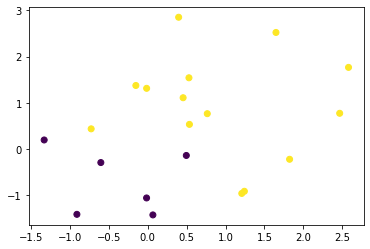

In [6]:
np.random.seed(42)

# Generar 20 instancias aleatorias con dos características
X = np.random.randn(20, 2)

# Generar etiquetas binarias aleatorias
y = np.random.choice([-1, 1], size=20)

# Asegurar que el conjunto de datos sea linealmente separable
X[y == 1] += 1

# Graficar el conjunto de datos
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Asignación 2

Genera un dataset de clasificación binaria $\pm1$, de veinte instancias, aleatorio, de dos características, que contenga todos los puntos de una clase entre dos parábolas y los puntos por arriba o por debajo de estas parábolas pertenezcan a la otra clase. Grafique el dataset generado y coloree los puntos deacuerdo a su etiqueta.

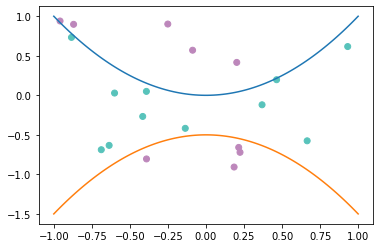

In [7]:
# Generar 20 instancias aleatorias con dos características
np.random.seed(42)
X = np.random.uniform(-1, 1, (20, 2)) # Generar 20 instancias aleatorias con dos características en el rango de -1 a 1

# Definir las parábolas
y1 = X[:, 0]**2  # Parábola hacia arriba
y2 = -X[:, 0]**2 - 0.5  # Parábola hacia abajo

# Asignar etiquetas según la posición de los puntos respecto a las parábolas
# Si un punto está por encima o por debajo de las parábolas, se etiqueta como 1, de lo contrario, se etiqueta como -1
y = np.where((X[:, 1] > np.maximum(y1, y2)) | (X[:, 1] < np.minimum(y1, y2)), 1, -1)

colors = ['#BD87BB' if label == 1 else '#58C3BB' for label in y]

# Graficar el conjunto de datos y las parábolas
plt.scatter(X[:, 0], X[:, 1], c=colors)
x = np.linspace(-1, 1, 100)
plt.plot(x, x**2)
plt.plot(x, -x**2 - 0.5)
plt.show()

## Asignación 3

Implemente una clase que permita ajustar un modelo de Máquinas de Vectores de Soporte. La clase debe cumplir con los siguientes requisitos:

- Debe contar con un método para realizar el entrenamiento en caso de ser requerido.
- Debe contar con un método para realizar las predicciones.
- Debe de poder utilizar un kernel de identidad o de RBF.
- Debe almacenar los vectores de soporte.

In [8]:
from sklearn.svm import SVC

class SVM:
    def __init__(self, kernel='linear'):
        # Inicializar el modelo con el kernel especificado
        self.model = SVC(kernel=kernel)
    
    def train(self, X, y):
        # Entrenar el modelo con los datos proporcionados
        self.model.fit(X, y)
    
    def predict(self, X):
        # Realizar predicciones con el modelo entrenado
        return self.model.predict(X)
    
    def get_support_vectors(self):
        # Obtener los vectores de soporte del modelo
        return self.model.support_vectors_


Esta clase implementa un modelo de Máquinas de Vectores de Soporte utilizando la clase SVC de la biblioteca scikit-learn. Al inicializar la clase se puede especificar el kernel a utilizar (linear o rbf). La clase cuenta con un método para entrenar el modelo (train), un método para realizar predicciones (predict) y un método para obtener los vectores de soporte (get_support_vectors).

## Asignación 4

Entrene un modelo de SVM (utilizando la clase implementada anteriormente) utilizando el dataset generado en la asignación 1 y un kernel de identidad. Grafique las predicciones de su modelo y marque los puntos que son vectores de soporte.

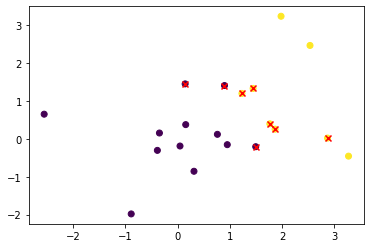

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

class SVM:
    def __init__(self, kernel='linear'):
        # Inicializar el modelo con el kernel especificado
        self.model = SVC(kernel=kernel)
    
    def train(self, X, y):
        # Entrenar el modelo con los datos proporcionados
        self.model.fit(X, y)
    
    def predict(self, X):
        # Realizar predicciones con el modelo entrenado
        return self.model.predict(X)
    
    def get_support_vectors(self):
        # Obtener los vectores de soporte del modelo
        return self.model.support_vectors_

# Generar el conjunto de datos de la asignación 1
np.random.seed(0)
X = np.random.randn(20, 2)
y = np.random.choice([-1, 1], size=20)
X[y == 1] += 1

# Entrenar el modelo de SVM con un kernel de identidad
model = SVM(kernel='linear')
model.train(X, y)

# Obtener las predicciones del modelo
y_pred = model.predict(X)

# Graficar las predicciones del modelo
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

# Marcar los vectores de soporte
support_vectors = model.get_support_vectors()
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], marker='x', color='red')

plt.show()


Este código utiliza la clase SVM implementada anteriormente para entrenar un modelo de Máquinas de Vectores de Soporte con un kernel de identidad. Primero se genera el conjunto de datos de la asignación 1 y se utiliza para entrenar el modelo. Luego se obtienen las predicciones del modelo y se grafican junto con los vectores de soporte.

## Asignación 5

Entrene un modelo de SVM (utilizando la clase implementada anteriormente) utilizando el dataset generado en la asignación 2 y un kernel de RBF. Grafique las predicciones de su modelo y marque los puntos que son vectores de soporte.

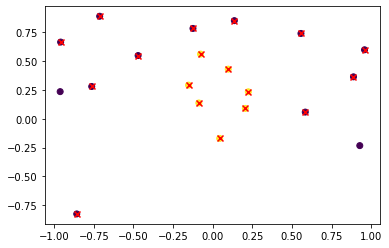

In [10]:
class SVM_:
    def __init__(self, kernel='linear'):
        # Inicializar el modelo con el kernel especificado
        self.model = SVC(kernel=kernel)
    
    def train(self, X, y):
        # Entrenar el modelo con los datos proporcionados
        self.model.fit(X, y)
    
    def predict(self, X):
        # Realizar predicciones con el modelo entrenado
        return self.model.predict(X)
    
    def get_support_vectors(self):
        # Obtener los vectores de soporte del modelo
        return self.model.support_vectors_

# Generar el conjunto de datos proporcionado
np.random.seed(0)
X = np.random.uniform(-1, 1, (20, 2))
y1 = X[:, 0]**2
y2 = X[:, 0]**2 + 0.5
y = np.where((X[:, 1] > y1) & (X[:, 1] < y2), 1, -1)

# Entrenar el modelo de SVM con un kernel RBF
model = SVM(kernel='rbf')
model.train(X, y)

# Obtener las predicciones del modelo
y_pred = model.predict(X)

# Graficar las predicciones del modelo
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

# Marcar los vectores de soporte
support_vectors = model.get_support_vectors()
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], marker='x', color='red')

plt.show()


Utiliza la clase SVM implementada anteriormente para entrenar un modelo de Máquinas de Vectores de Soporte con un kernel RBF. Primero se genera el conjunto de datos proporcionado y se utiliza para entrenar el modelo. Luego se obtienen las predicciones del modelo y se grafican junto con los vectores de soporte.